In [1]:
# Importa bibliotecas necessárias para manipulação de dados e criação de gráficos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importa ferramentas do scikit-learn para carregar dados, dividir conjuntos e criar modelos
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
# Carrega o dataset Iris
iris = load_iris()

# Cria um DataFrame com os dados (features) do dataset
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Adiciona a coluna de rótulo (target) e converte os números em nomes das espécies
df['target'] = iris.target
df['species'] = df['target'].apply(lambda x: iris.target_names[x])

# Exibe as primeiras 5 linhas para verificar se os dados foram carregados corretamente
display(df.head())


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


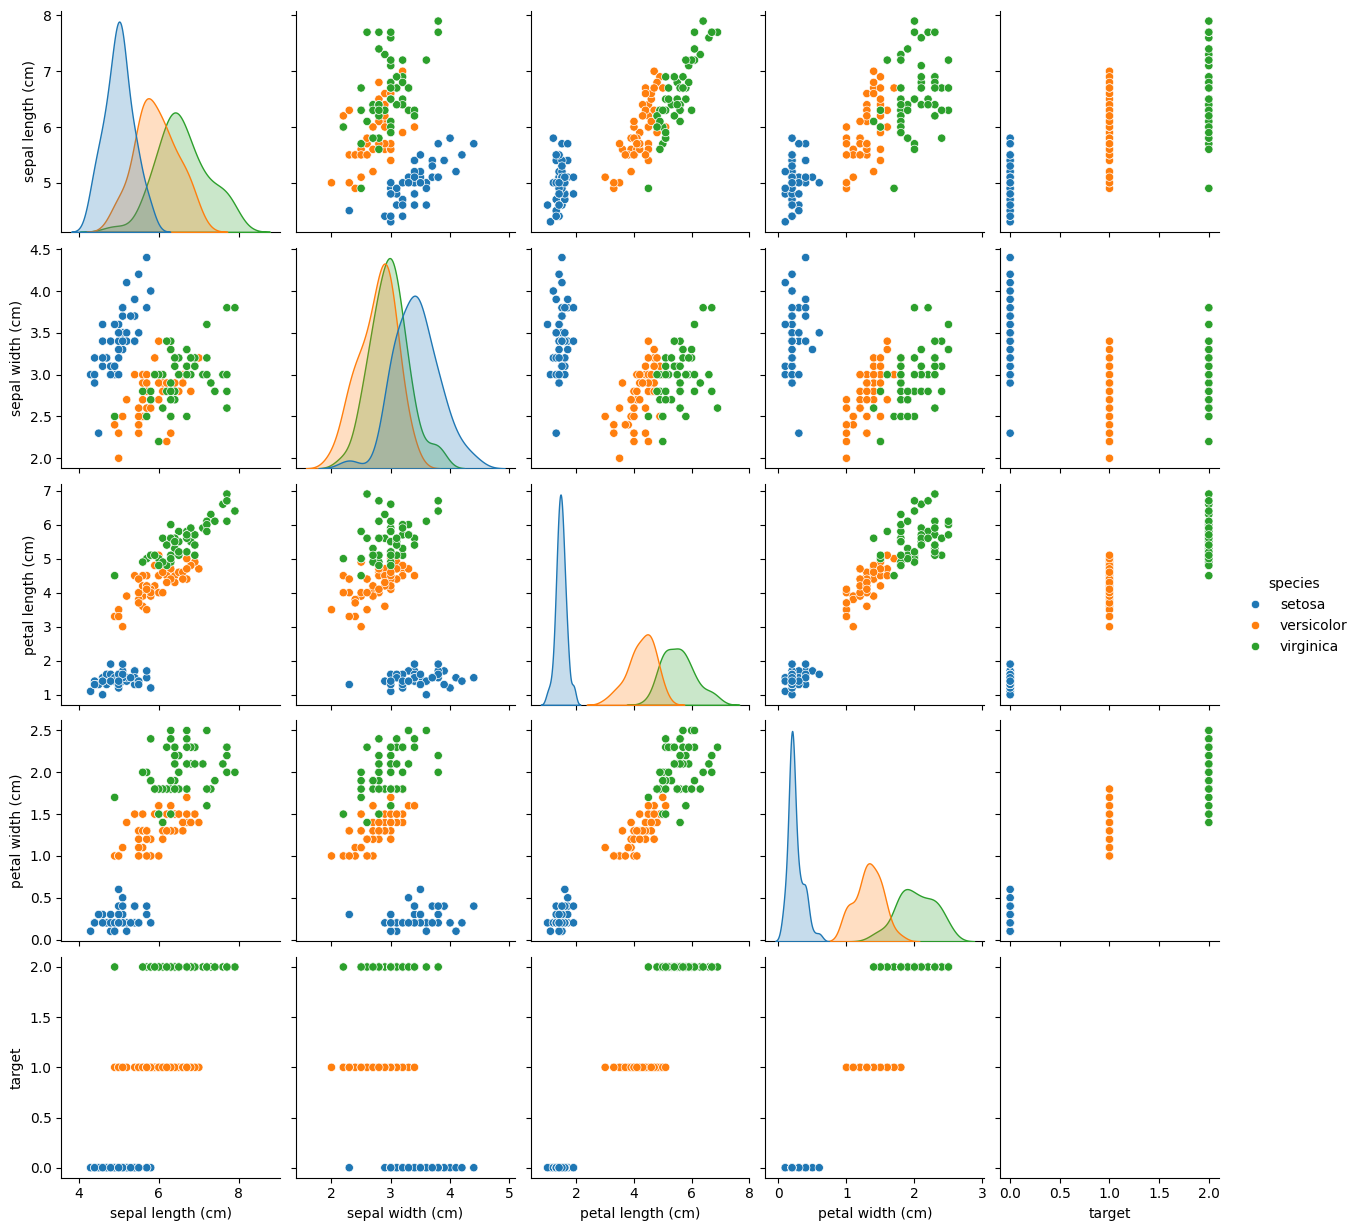

In [3]:
# Cria um pairplot para visualizar as relações entre todas as variáveis, colorindo pelos nomes das espécies
sns.pairplot(df, hue='species')
plt.show()


In [4]:
# Define as variáveis independentes (X) e a variável dependente (y)
X = df[iris.feature_names]
y = df['target']

# Divide os dados: 70% para treinamento e 30% para teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [5]:
# Cria o modelo de árvore de decisão
clf = DecisionTreeClassifier(random_state=42)

# Treina o modelo utilizando os dados de treinamento
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [6]:
# Faz as predições com o modelo treinado utilizando os dados de teste
y_pred = clf.predict(X_test)

# Calcula e exibe a acurácia (percentual de acertos)
print("Acurácia:", accuracy_score(y_test, y_pred))

# Mostra a matriz de confusão, que compara os valores reais com os preditos
print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))

# Exibe um relatório detalhado com métricas de avaliação
report_dict = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report_dict).transpose()
display(report_df)


Acurácia: 1.0
Matriz de Confusão:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


,precision,recall,f1-score,support
0,1.0,1.0,1.0,19.0
1,1.0,1.0,1.0,13.0
2,1.0,1.0,1.0,13.0
accuracy,1.0,1.0,1.0,1.0
macro avg,1.0,1.0,1.0,45.0
weighted avg,1.0,1.0,1.0,45.0


In [7]:
# Importa o algoritmo K-Means do scikit-learn
from sklearn.cluster import KMeans

# Cria o modelo K-Means com 3 clusters (pois o dataset possui 3 espécies)
kmeans = KMeans(n_clusters=3, random_state=42)

# Aplica o modelo ao dataset e armazena os clusters obtidos
clusters = kmeans.fit_predict(iris.data)

# Adiciona a coluna 'cluster' ao DataFrame para identificar a qual grupo cada registro pertence
df['cluster'] = clusters

# Exibe as primeiras linhas para ver a nova coluna com os clusters
display(df.head())


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species,cluster
0,5.1,3.5,1.4,0.2,0,setosa,1
1,4.9,3.0,1.4,0.2,0,setosa,1
2,4.7,3.2,1.3,0.2,0,setosa,1
3,4.6,3.1,1.5,0.2,0,setosa,1
4,5.0,3.6,1.4,0.2,0,setosa,1


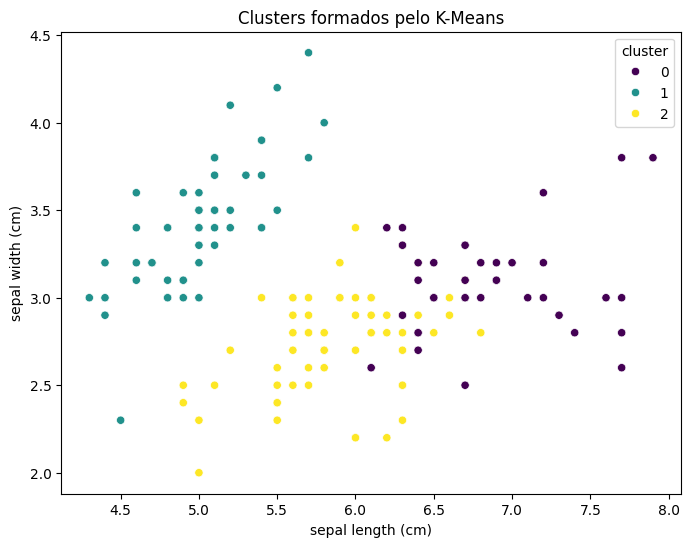

In [8]:
# Create scatter plot with correct syntax
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, 
                x=iris.feature_names[0], 
                y=iris.feature_names[1], 
                hue='cluster',
                palette='viridis')

plt.title("Clusters formados pelo K-Means")
plt.show()

In [10]:
# Cria uma tabela que compara os clusters formados com as espécies reais
display(pd.crosstab(df['cluster'], df['species']))


species,setosa,versicolor,virginica
cluster,,,
0,0,3,36
1,50,0,0
2,0,47,14
